<a href="https://colab.research.google.com/github/divyaa-vermaa03/Practice_codes/blob/main/practice_code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!git clone https://github.com/theislab/scanpy_usage.git


Cloning into 'scanpy_usage'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 714 (delta 11), reused 6 (delta 0), pack-reused 694 (from 1)
Receiving objects: 100% (714/714), 98.73 MiB | 33.79 MiB/s, done.
Resolving deltas: 100% (310/310), done.


In [28]:
from google.colab import files
uploaded = files.upload()

Saving scanpy-pbmc3k.h5ad to scanpy-pbmc3k (1).h5ad


In [29]:
!pip install scanpy
import scanpy as sc

# Load the dataset
adata = sc.read("scanpy-pbmc3k.h5ad")

# display basic information
print(adata)



AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [30]:
# remove cells with zero total count
sc.pp.filter_cells(adata, min_counts=1)


In [31]:
# Filter low-quality cells first
sc.pp.filter_cells(adata, min_counts=1)
sc.pp.filter_genes(adata, min_cells=1)

# Normalize total counts
sc.pp.normalize_total(adata, target_sum=1e4)

# log-transform
sc.pp.log1p(adata)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:391: RuntimeWarning: invalid value encountered in log1p
  np.log1p(x, out=x)


In [32]:
import scanpy as sc

# load built-in pbm3ck dataset
adata = sc.datasets.pbmc3k()

# Check that data loaded correctly
print("Number of cells:", adata.n_obs)
print("Number of genes:", adata.n_vars)

Number of cells: 2700
Number of genes: 32738


In [33]:
!pip install python-igraph leidenalg --quiet



/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:577: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  x = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)


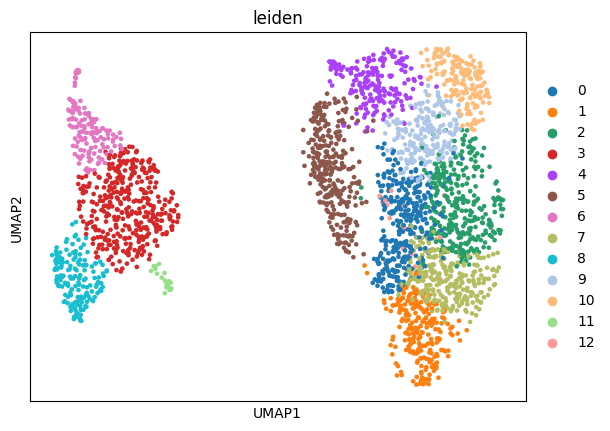

In [34]:
import scanpy as sc

# Assuming adata is already loaded and PCA is computed
sc.pp.neighbors(adata)
sc.tl.leiden(adata, flavor="igraph")
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden'])

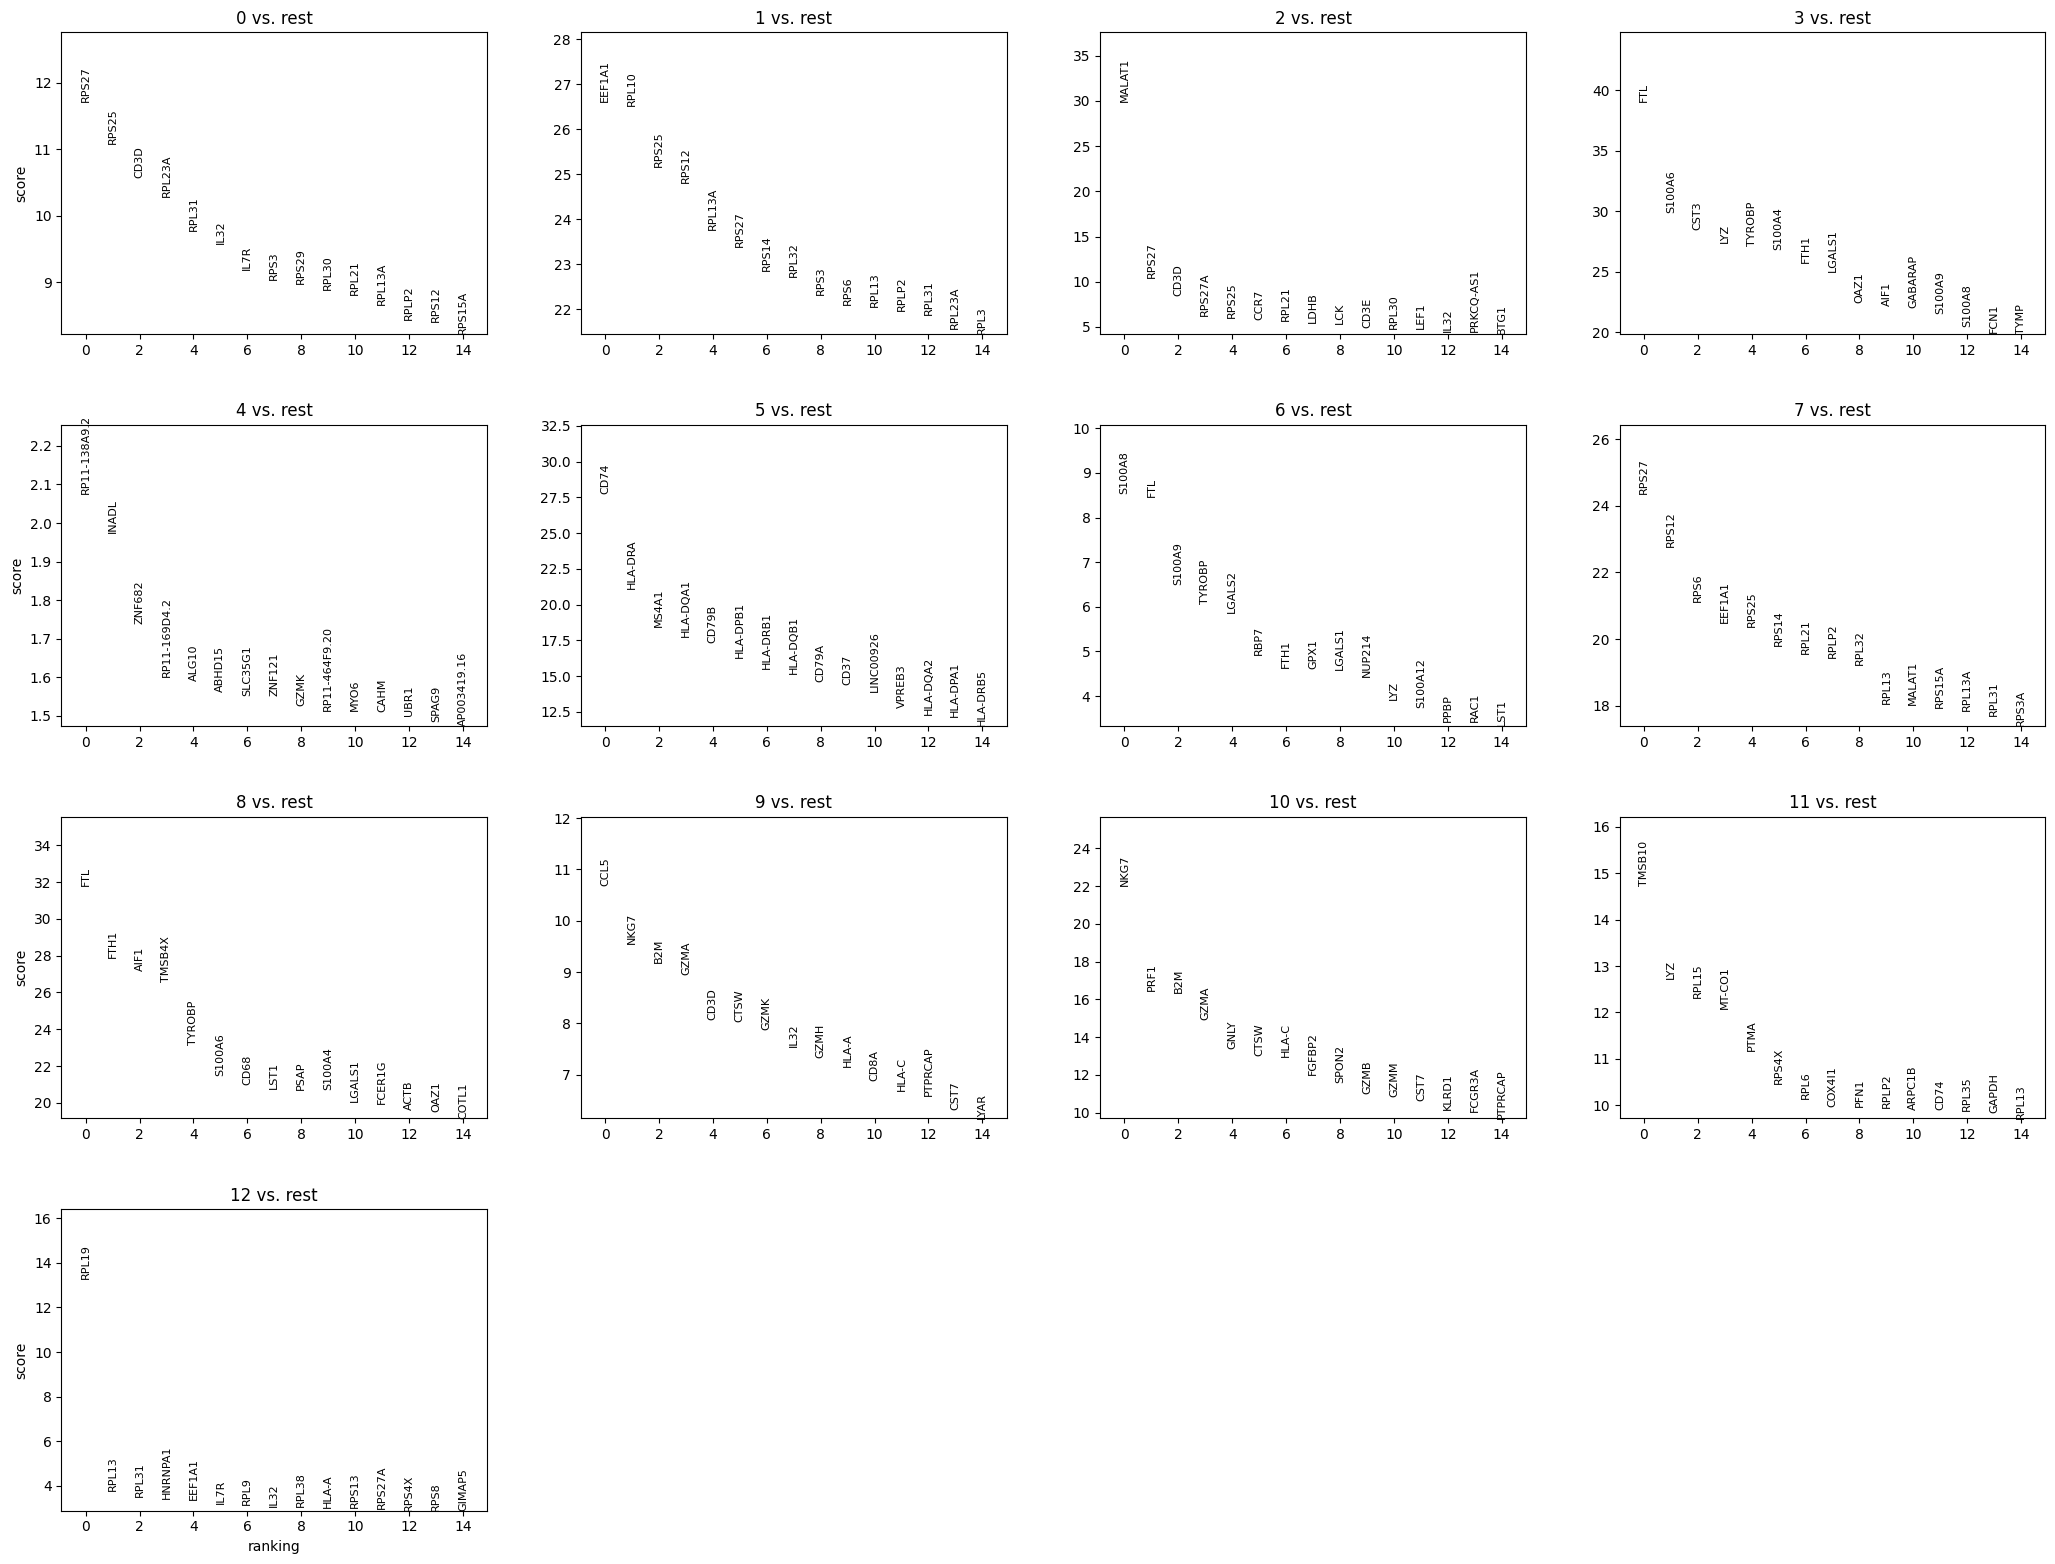

In [35]:
# Identify top marker genes per cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

# Visualize top genes
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

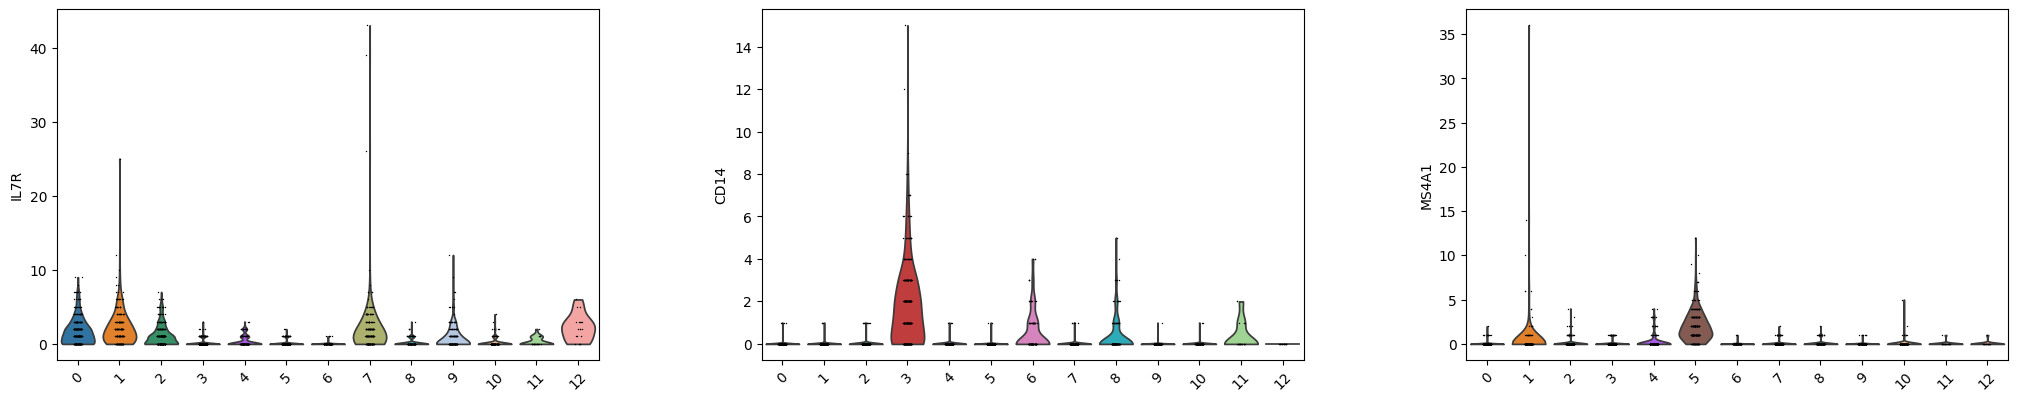

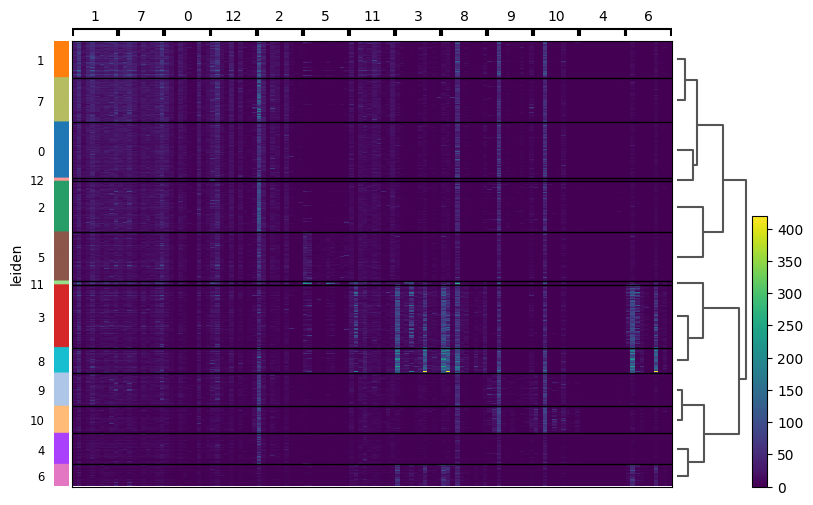

In [36]:
# Violin plot for gene expression per cluster
sc.pl.violin(adata, ['IL7R', 'CD14','MS4A1'], groupby='leiden', rotation=45)

# Heatmap of top genes per cluster
sc.pl.rank_genes_groups_heatmap(adata, n_genes =10, groupby='leiden', show = True)